# Thyroid Disease Classification Using Multi-layer Perceptron Neural Network

## Validation and Learning Curves

In [1]:
# Load the final model from the previous analysis

from keras.models import load_model
model1 = load_model('mlp-imbalanced-data.h5')

/home/tkokkeng/python/venv/tensorflow-3.6-venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [2]:
model1

In [3]:
#from IPython.display import SVG
#from keras.utils.vis_utils import model_to_dot

#SVG(model_to_dot(model1).create(prog='dot', format='svg'))

In [4]:
# Load the datasets
import pandas as pd
df_train = pd.read_csv('norm-ann-train.csv')
df_test = pd.read_csv('norm-ann-test.csv')

# Prepare the feature and label datasets.
df_train_x = df_train.drop('class', axis=1)
df_train_y = df_train['class']

df_test_x = df_test.drop('class', axis=1)
df_test_y = df_test['class']

# convert labels to 0, 1, 2
df_train_y_rescale = df_train_y - 1
df_test_y_rescale = df_test_y - 1

## Tuning Hyper Parameters with Cross-validation 

In [5]:
# Ramge of sizes of neural network for grid search.
param_grid = [
  {'layer1': [32, 64], 'layer2': [0, 32, 64], 'layer3': [0]},
  {'layer1': [32, 64], 'layer2': [32, 64], 'layer3': [32, 64]},
 ]
# Function to create model, required for KerasClassifier
from keras import models
from keras import layers
def create_model_gscv(layer1 = 64, layer2 = 64, layer3 = 64):
    
    # create model
    model = models.Sequential()
    
    # Hidden layers
    model.add(layers.Dense(layer1, activation='relu', input_shape=(36,)))
    if (layer2 > 0) :
        model.add(layers.Dense(layer2, activation='relu'))
    if (layer3 > 0) :
        model.add(layers.Dense(layer3, activation='relu'))

    # Output layer
    model.add(layers.Dense(3, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
model2 = KerasClassifier(build_fn=create_model_gscv, epochs=16, batch_size=128, verbose=0)

import numpy as np
from sklearn.model_selection import KFold
seed = 123
np.random.seed(seed)
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=1, cv=kfold, refit=True, verbose=0, return_train_score=True)
grid_result = grid.fit(df_train_x, df_train_y_rescale)

In [6]:
# Summarize results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.941145 using {'layer1': 64, 'layer2': 64, 'layer3': 64}
0.924708 (0.003735) with: {'layer1': 32, 'layer2': 0, 'layer3': 0}
0.924973 (0.003565) with: {'layer1': 32, 'layer2': 32, 'layer3': 0}
0.926564 (0.002603) with: {'layer1': 32, 'layer2': 64, 'layer3': 0}
0.926034 (0.003418) with: {'layer1': 64, 'layer2': 0, 'layer3': 0}
0.933192 (0.006209) with: {'layer1': 64, 'layer2': 32, 'layer3': 0}
0.935313 (0.002637) with: {'layer1': 64, 'layer2': 64, 'layer3': 0}
0.931866 (0.002927) with: {'layer1': 32, 'layer2': 32, 'layer3': 32}
0.931866 (0.006640) with: {'layer1': 32, 'layer2': 32, 'layer3': 64}
0.937964 (0.003452) with: {'layer1': 32, 'layer2': 64, 'layer3': 32}
0.940615 (0.006021) with: {'layer1': 32, 'layer2': 64, 'layer3': 64}
0.936108 (0.002283) with: {'layer1': 64, 'layer2': 32, 'layer3': 32}
0.941145 (0.004689) with: {'layer1': 64, 'layer2': 32, 'layer3': 64}
0.938229 (0.004225) with: {'layer1': 64, 'layer2': 64, 'layer3': 32}
0.941145 (0.003613) with: {'layer1': 64, 'layer

In [7]:
# Sort the results by Params.
results2 = grid_result.cv_results_
results2

{'mean_fit_time': array([1.03773578, 1.01987139, 1.26140801, 1.28630527, 1.21741652,
        1.3809344 , 1.43482296, 1.49438556, 1.61808999, 1.69595083,
        1.80646602, 1.8575085 , 1.96591202, 2.13555829]),
 'std_fit_time': array([0.23802671, 0.03130608, 0.08044654, 0.18838167, 0.01305495,
        0.05957245, 0.07072709, 0.01654461, 0.07615283, 0.03210199,
        0.07352531, 0.02453552, 0.02568153, 0.07307046]),
 'mean_score_time': array([0.04514845, 0.06769188, 0.14158487, 0.12483525, 0.13979109,
        0.16436124, 0.19566298, 0.22240567, 0.25459917, 0.28459835,
        0.31449954, 0.34718752, 0.37997174, 0.41001058]),
 'std_score_time': array([0.00490004, 0.008184  , 0.06187094, 0.01350849, 0.00572207,
        0.00627924, 0.00860331, 0.00712684, 0.00386966, 0.00641787,
        0.00673159, 0.00787991, 0.00996212, 0.00553148]),
 'param_layer1': masked_array(data=[32, 32, 32, 64, 64, 64, 32, 32, 32, 32, 64, 64, 64, 64],
              mask=[False, False, False, False, False, False,

In [28]:
# Save results to file.
import pickle

filename = 'cvresults.pkl'
results_file = open(filename, 'wb')
pickle.dump(results2, results_file)
results_file.close()

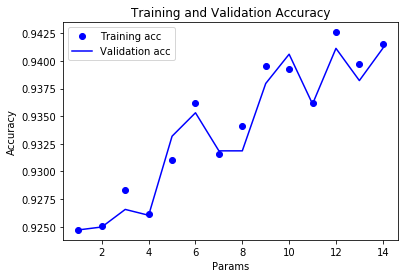

In [10]:
# Plotting the training and validation accuracy

import matplotlib.pyplot as plt

plt.clf()

acc2 = grid_result.cv_results_['mean_train_score']
val_acc2 = grid_result.cv_results_['mean_test_score']

params2 = range(1, len(grid_result.cv_results_['params']) + 1)

plt.plot(params2, acc2, 'bo', label='Training acc')
plt.plot(params2, val_acc2, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Params')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
df_params = pd.DataFrame(grid_result.cv_results_['params'])
df_params

,layer1,layer2,layer3
0,32,0,0
1,32,32,0
2,32,64,0
3,64,0,0
4,64,32,0
5,64,64,0
6,32,32,32
7,32,32,64
8,32,64,32
9,32,64,64


In [21]:
df_acc = pd.DataFrame({'Train_Scores':grid_result.cv_results_['mean_train_score'],
                       'Test_Scores':grid_result.cv_results_['mean_test_score']})
df_acc

,Train_Scores,Test_Scores
0,0.924709,0.924708
1,0.925106,0.924973
2,0.928288,0.926564
3,0.926167,0.926034
4,0.931072,0.933192
5,0.936241,0.935313
6,0.931601,0.931866
7,0.934119,0.931866
8,0.939555,0.937964
9,0.939289,0.940615


In [22]:
df_results = pd.concat([df_params, df_acc], axis=1)
df_results

,layer1,layer2,layer3,Train_Scores,Test_Scores
0,32,0,0,0.924709,0.924708
1,32,32,0,0.925106,0.924973
2,32,64,0,0.928288,0.926564
3,64,0,0,0.926167,0.926034
4,64,32,0,0.931072,0.933192
5,64,64,0,0.936241,0.935313
6,32,32,32,0.931601,0.931866
7,32,32,64,0.934119,0.931866
8,32,64,32,0.939555,0.937964
9,32,64,64,0.939289,0.940615


In [23]:
df_results = df_results.sort_values(by=['layer1', 'layer2', 'layer3'])
df_results

,layer1,layer2,layer3,Train_Scores,Test_Scores
0,32,0,0,0.924709,0.924708
1,32,32,0,0.925106,0.924973
6,32,32,32,0.931601,0.931866
7,32,32,64,0.934119,0.931866
2,32,64,0,0.928288,0.926564
8,32,64,32,0.939555,0.937964
9,32,64,64,0.939289,0.940615
3,64,0,0,0.926167,0.926034
4,64,32,0,0.931072,0.933192
10,64,32,32,0.936241,0.936108


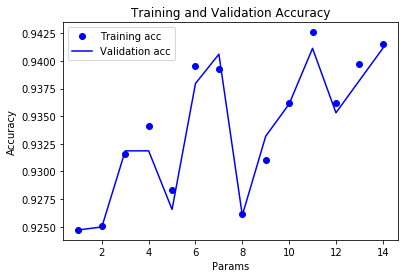

In [27]:
# Plotting the training and validation accuracy

import matplotlib.pyplot as plt

plt.clf()

params2 = range(1, len(df_results) + 1)

plt.plot(params2, df_results['Train_Scores'], 'bo', label='Training acc')
plt.plot(params2, df_results['Test_Scores'], 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Params')
plt.ylabel('Accuracy')
plt.legend()
plt.show()